In [23]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve

In [9]:
modeling_df = pd.read_csv("Bank Customer Churn Data/Prepared Data/obj5_bank_churn_df.csv",
                            encoding="ISO-8859-1",
                            low_memory=False).drop("Unnamed: 0", axis = 1)
modeling_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Balance             10000 non-null  float64
 1   NumOfProducts       10000 non-null  int64  
 2   Tenure              10000 non-null  int64  
 3   Exited              10000 non-null  int64  
 4   CreditScore         10000 non-null  int64  
 5   Age                 10000 non-null  float64
 6   EstimatedSalary     10000 non-null  float64
 7   HasCrCard_Yes       10000 non-null  bool   
 8   IsActiveMember_Yes  10000 non-null  bool   
 9   Geography_Germany   10000 non-null  bool   
 10  Geography_Spain     10000 non-null  bool   
 11  Gender_Male         10000 non-null  bool   
 12  Balance_v_Salary    10000 non-null  float64
 13  Income_v_Products   10000 non-null  float64
dtypes: bool(5), float64(5), int64(4)
memory usage: 752.1 KB


In [10]:
modeling_df.describe()

,Balance,NumOfProducts,Tenure,Exited,CreditScore,Age,EstimatedSalary,Balance_v_Salary,Income_v_Products
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,76485.889288,1.530200,5.012800,0.203700,650.528800,38.921500,100092.252506,3.878703,74717.170627
std,62397.405202,0.581654,2.892174,0.402769,96.653299,10.487552,57510.146401,108.337260,52059.497823
min,0.000000,1.000000,0.000000,0.000000,350.000000,18.000000,11.580000,0.000000,11.580000
25%,0.000000,1.000000,3.000000,0.000000,584.000000,32.000000,51002.110000,0.000000,32589.780000
50%,97198.540000,1.000000,5.000000,0.000000,652.000000,37.000000,100196.062500,0.747002,65908.002500
75%,127644.240000,2.000000,7.000000,0.000000,718.000000,44.000000,149388.247500,1.514022,100943.797500
max,250898.090000,4.000000,10.000000,1.000000,850.000000,92.000000,199992.480000,10614.655440,199970.740000


In [11]:
X = modeling_df.drop(["Exited"],axis=1)
y = modeling_df["Exited"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state = 2024)

X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8000 entries, 8276 to 7816
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Balance             8000 non-null   float64
 1   NumOfProducts       8000 non-null   int64  
 2   Tenure              8000 non-null   int64  
 3   CreditScore         8000 non-null   int64  
 4   Age                 8000 non-null   float64
 5   EstimatedSalary     8000 non-null   float64
 6   HasCrCard_Yes       8000 non-null   bool   
 7   IsActiveMember_Yes  8000 non-null   bool   
 8   Geography_Germany   8000 non-null   bool   
 9   Geography_Spain     8000 non-null   bool   
 10  Gender_Male         8000 non-null   bool   
 11  Balance_v_Salary    8000 non-null   float64
 12  Income_v_Products   8000 non-null   float64
dtypes: bool(5), float64(5), int64(3)
memory usage: 601.6 KB


In [12]:
logreg = LogisticRegression(max_iter = 100000)
lr = logreg.fit(X_train, y_train)
print(f"Train Accuracy: {lr.score(X_train, y_train)}")

Train Accuracy: 0.790125


In [13]:
confusion_matrix(y_train, lr.predict(X_train))

array([[6203,  169],
       [1510,  118]])

In [14]:
recall_score(y_train,lr.predict(X_train))

0.07248157248157248

In [15]:
list(zip(X_train,lr.coef_[0]))

[('Balance', 2.70546692449172e-06),
 ('NumOfProducts', 0.0003975005544583435),
 ('Tenure', -0.002755975872677881),
 ('CreditScore', -0.004997862934873304),
 ('Age', 0.04548179596253706),
 ('EstimatedSalary', -8.2720738980115e-06),
 ('HasCrCard_Yes', -0.0024377480396645546),
 ('IsActiveMember_Yes', -0.0024377480396645546),
 ('Geography_Germany', 0.0016210312596434285),
 ('Geography_Spain', -0.0006143444130815711),
 ('Gender_Male', -0.0016502174627312392),
 ('Balance_v_Salary', 0.00041117013480164774),
 ('Income_v_Products', 8.580514006646727e-06)]

In [16]:
confusion_matrix(y_test, lr.predict(X_test))

array([[1557,   34],
       [ 383,   26]])

In [17]:
print(f"Train Accuracy: {lr.score(X_test, y_test)}")

Train Accuracy: 0.7915


In [18]:
precision = precision_score(y_test, lr.predict(X_test))
recall = recall_score(y_test, lr.predict(X_test))
f1 = f1_score(y_test, lr.predict(X_test))

print(f"Model Evaluation Metrics:\n"
      f"Precision: {precision:.2f}\n"
      f"Recall: {recall:.2f}\n"
      f"F1 Score: {f1:.2f}")

Model Evaluation Metrics:
Precision: 0.43
Recall: 0.06
F1 Score: 0.11


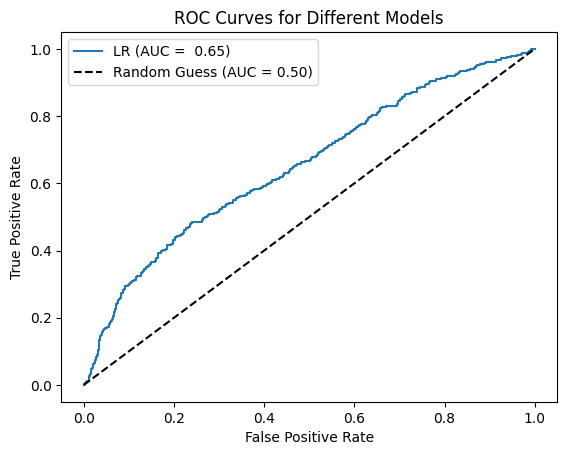

In [22]:
y_probs = lr.predict_proba(X_test)[:, 1]
fpr1, tpr1, thresholds = roc_curve(y_test, y_probs)
auc_score1 = auc(fpr1,tpr1)

# Plot the ROC curve
plt.plot(fpr1, tpri, label=f'LR (AUC = {auc_score1: .2f})')
# Draw Random Guess
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess (AUC = 0.50)')
# Modify Formatting
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Different Models' )
plt.legend()
plt.show()

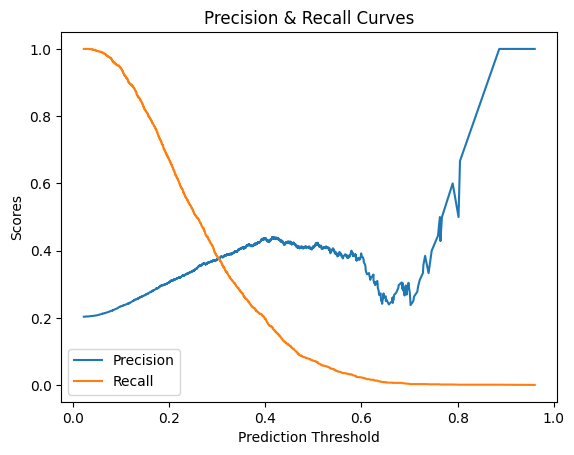

In [25]:
p_curve, r_curve, t_curve = precision_recall_curve(y_train, lr.predict_proba(X_train)[:,1])
plt.plot(t_curve, p_curve[:-1], label='Precision')
plt.plot(t_curve, r_curve[:-1], label='Recall')
plt.xlabel('Prediction Threshold' )
plt.ylabel('Scores')
plt.legend()
plt.title('Precision & Recall Curves')
plt.show()

In [26]:
np.where(p_curve>0.5)

(array([7995, 7997, 7998, 7999, 8000]),)

In [27]:
t_curve[7995]

0.789664435543582

In [31]:
confusion_matrix(y_test, lr.predict_log_proba(X_test)[:,1] > 0.789664435543582)

array([[1591,    0],
       [ 409,    0]])

In [32]:
precision_score(y_test, lr.predict_log_proba(X_test)[:,1] > 0.789664435543582)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.0